<a href="https://colab.research.google.com/github/Himanshu584/pizza_steak_binary_classification_CNN/blob/main/Binary_image_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will build binary image classification model using CNN deep-learning algorithm to classify `Pizza` and `Steak`.

---



#Loading data

Data is available in `zip` format.
zipfile link :-  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

Images in the dataset are arranged into diffrent subgroups like:-
 `train_data` and `test_data`


In [1]:
import zipfile

# Download the pizza-steak zip file
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded zip file 
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-08-18 10:46:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.5.128, 74.125.206.128, 64.233.184.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.5.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  39.1MB/s    in 2.7s    

2021-08-18 10:46:37 (39.1 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



Now we have downloaded and extracted the required data into `pizza_steak` directory.

---

#Inspect the data


In [2]:
!ls pizza_steak

test  train


we have train and test folders , lets now inspect each of these separately

In [3]:
!ls pizza_steak/test

pizza  steak


In [4]:
# look at data that these files have
!ls pizza_steak/test/pizza

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

All the files in these folders is image data in .jpg format

In [5]:
# Count number of images in each directory
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


We have 750 images each of pizza and steak in training data and 250 images for each pizza and steak in test data

#Visualize the data

Lets visualize some of images in our data to get some idea of the data we are dealing with

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random 

#function to view a random image sample from given directory and class
def get_random_image(target_dir,target_class):
  ''' takes in first argument a target_directory (example: "pizza_steak/test/")
  and Second argument a target_class (example: pizza or Steak) and then returns -> image_shape ,image_title and image '''

  # setup for target directory (images are viewed from here)
  target_folder = target_dir+target_class

  # Random image path from folder
  random_img = random.sample(os.listdir(target_folder),1)

  # plot the data
  img = mping.imread(target_folder+'/'+random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  
  print(f"image_shape: {img.shape}") #shows image shape

  return img

image_shape: (384, 512, 3)


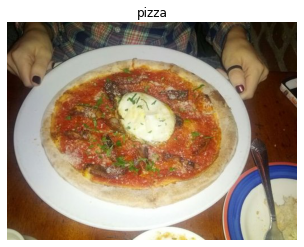

In [7]:
# view random pizza image from train data
img = get_random_image(target_dir="pizza_steak/train/",target_class="pizza") 

image_shape: (512, 512, 3)


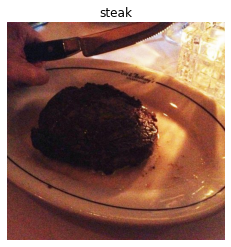

In [8]:
# view random steak image from train data
img2 = get_random_image(target_dir="pizza_steak/train/",target_class="steak")

image_shape: (512, 512, 3)


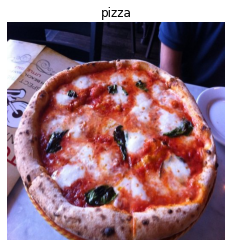

In [9]:
# view samples from test data 
img3 = get_random_image(target_dir="pizza_steak/test/",target_class="pizza")

image_shape: (512, 512, 3)


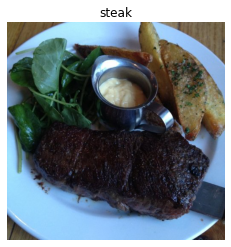

In [10]:
img4 = get_random_image(target_dir="pizza_steak/test/",target_class="steak")

Now we have an idea how our data/samples look like . Now lets prepare it for feeding into neural network .

Our images are just a array/tensor containing pixel values.
* first we need to scale down the images between 0-1 `(Normalization)`
* we need to create a `validation dataset`.(for this model test_data = valid_data)
* `shuffle` the normalized samples

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Generates batches of tensor image data with real-time data augmentation.

# rescale parameters (rescale pixels between 0-1)
train_datagen = ImageDataGenerator(rescale=1./255)  # for training data
valid_datagen = ImageDataGenerator(rescale=1./255)  # for validation data

# set directories 
train_dir = "pizza_steak/train/"
valid_dir = "pizza_steak/test/"

# set Seed
tf.random.set_seed(42)

# turn data into batches and normalize it 
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, 
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42,
                                               shuffle= True)

val_data = valid_datagen.flow_from_directory(valid_dir,
                                             batch_size=32, 
                                             target_size = (224,224),
                                             class_mode = "binary",
                                             seed = 42,
                                             shuffle= True)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Build CNN model

In [12]:
# Model 1
model_1 = tf.keras.Sequential([
            tf.keras.layers.Conv2D(filters=10,
                                   kernel_size=3,
                                   strides=1,
                                   activation="relu",
                                   input_shape=(224,224,3)),
            tf.keras.layers.Conv2D(10,3, activation="relu"),
            tf.keras.layers.MaxPool2D(pool_size=2,
                                      padding="valid"),
            tf.keras.layers.Conv2D(10,3, activation="relu"),
            tf.keras.layers.Conv2D(10,3, activation="relu"),
            tf.keras.layers.MaxPool2D(2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Fit the Model 
history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data= val_data, validation_steps=len(val_data))

Epoch 1/5
47/47 [==============================] - 42s 258ms/step - loss: 0.5662 - accuracy: 0.6947 - val_loss: 0.3792 - val_accuracy: 0.8420
Epoch 2/5
47/47 [==============================] - 11s 238ms/step - loss: 0.4118 - accuracy: 0.8153 - val_loss: 0.3384 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 11s 235ms/step - loss: 0.3792 - accuracy: 0.8413 - val_loss: 0.3436 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 11s 237ms/step - loss: 0.3446 - accuracy: 0.8453 - val_loss: 0.3025 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 11s 236ms/step - loss: 0.2960 - accuracy: 0.8800 - val_loss: 0.2821 - val_accuracy: 0.8880


In [13]:
import pandas as pd

# Function to plot accuracy and loss curves 
def plot_history_graph(history):
    ''' takes in history as argument and returns seperate loss and accuracy graph for corresponding model'''

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.figure()
    plt.plot(epochs,loss, label='training_loss')
    plt.plot(epochs,val_loss, label='validation_loss')
    plt.title("loss")
    plt.xlabel("Epochs")
    plt.legend()

    # plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="validation_accuracy")
    plt.title("accuracy")
    plt.xlabel("Epochs")
    plt.legend();

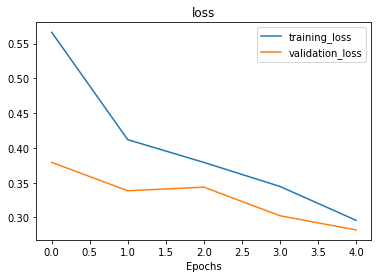

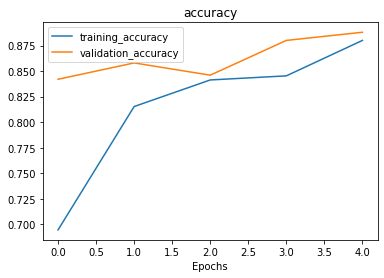

In [14]:
# plot history 1

plot_history_graph(history=history_1)

In [15]:
# Model 1 summary 

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

so our model_1 did very well as can be seen from plots . and we didnt have to do any data augmentation i.e changing height,width,zoom,angles of any image.

before predicting any image we need to make sure the image to be predicted is in same format as our training data. i.e shape of (224,224,3).

#THANKYU


